# EAI 6000 - FINAL PROJECT


## DATA READING



### 1.	Import libraries

In [ ]:
pip install xgboost

In [ ]:
pip install plotly

In [3]:
# Data cleaning and Manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


# Package for building regression model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainable AI (XAI)
!pip install lime
import lime.lime_tabular
!pip install shap
import shap

C:\Users\rajak\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
errors_df = pd.DataFrame()

### 2.	Import data

In [4]:
listing_links = '''http://data.insideairbnb.com/united-states/nc/asheville/2021-10-18/data/listings.csv.gz
http://data.insideairbnb.com/united-states/tx/austin/2021-10-14/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ma/boston/2021-10-19/data/listings.csv.gz
http://data.insideairbnb.com/united-states/fl/broward-county/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ma/cambridge/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/data/listings.csv.gz
http://data.insideairbnb.com/united-states/nv/clark-county-nv/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/united-states/oh/columbus/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/united-states/co/denver/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/united-states/hi/hawaii/2021-10-11/data/listings.csv.gz
http://data.insideairbnb.com/united-states/nj/jersey-city/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/los-angeles/2021-10-09/data/listings.csv.gz
http://data.insideairbnb.com/united-states/tn/nashville/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/united-states/la/new-orleans/2021-10-09/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ny/new-york-city/2021-10-06/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/oakland/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/pacific-grove/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/or/portland/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ri/rhode-island/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/or/salem-or/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-diego/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-francisco/2021-10-06/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-mateo-county/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/santa-clara-county/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/santa-cruz-county/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/wa/seattle/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/mn/twin-cities-msa/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/united-states/dc/washington-dc/2021-10-18/data/listings.csv.gz'''

In [5]:
listing_links = listing_links.split('\n')

In [6]:
input_df = pd.DataFrame()

for link in listing_links:
    city_df = pd.read_csv(filepath_or_buffer = link, header = 0)
    input_df = input_df.append(city_df)
    # input_df = pd.concat([input_df, city_df])

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [7]:
input_df = input_df.reset_index(drop = True)

In [8]:
input_df.head()

id                          listing_url       scrape_id last_scraped  \
0  108061  https://www.airbnb.com/rooms/108061  20211018161933   2021-10-18   
1  155305  https://www.airbnb.com/rooms/155305  20211018161933   2021-10-18   
2  156805  https://www.airbnb.com/rooms/156805  20211018161933   2021-10-18   
3  156926  https://www.airbnb.com/rooms/156926  20211018161933   2021-10-18   
4  160594  https://www.airbnb.com/rooms/160594  20211018161933   2021-10-18   

                                                name  \
0  Walk to stores/parks/downtown. Fenced yard/Pet...   
1                 Cottage! BonPaul + Sharky's Hostel   
2                  Private Room "Ader" at BPS Hostel   
3             Mixed Dorm "Top Bunk #1" at BPS Hostel   
4                                Historic Grove Park   

                                         description  \
0  Walk to town in ten minutes! Monthly rental in...   
1  <b>The space</b><br />Private cottage located ...   
2  <b>The space</b><br />Private Rooms at Bon Pau...   
3  This is a top bunk in the mixed dorm room<br /...   
4  Come enjoy the beautiful Grove Park neighborho...   

                               neighborhood_overview  \
0  I love my neighborhood! Its friendly, easy-goi...   
1  We are within easy walk of pubs, breweries, mu...   
2  Easy walk to pubs, cafes, bakery, breweries, l...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/41011975/0cdf...   320564   
1  https://a0.muscache.com/pictures/8880711/cf38d...   746673   
2  https://a0.muscache.com/pictures/23447d55-fa7e...   746673   
3  https://a0.muscache.com/pictures/98f4e655-c4d6...   746673   
4  https://a0.muscache.com/pictures/92433837/d340...   769252   

                                   host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/320564  ...                        4.79   
1  https://www.airbnb.com/users/show/746673  ...                        4.75   
2  https://www.airbnb.com/users/show/746673  ...                        4.61   
3  https://www.airbnb.com/users/show/746673  ...                        4.79   
4  https://www.airbnb.com/users/show/769252  ...                        4.88   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.84                4.48     NaN                f   
1                   4.93                4.52     NaN                t   
2                   4.84                4.46     NaN                t   
3                   4.77                4.78     NaN                t   
4                   4.90                4.85     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              7                                           1   
2                              7                                           1   
3                              7                                           1   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            2   
2                                            2   
3                                            2   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.73  
1                                           4              5.43  
2                                           4              2.68  
3                                           4              3.40  
4                                           0              0.47  

[5 rows x 74 columns]

In [9]:
features = '''accommodates
amenities
availability_365
bedrooms
beds
calculated_host_listings_count
host_has_profile_pic
host_identity_verified
host_response_rate
host_response_time
instant_bookable
last_review
maximum_nights
minimum_nights
host_location
number_of_reviews
price
property_type
review_scores_rating
reviews_per_month
room_type
latitude
longitude'''
# Removing name-features. -- host_name, name
 
features = sorted(features.split("\n"))
for i in range(len(features)):
  print(i, features[i])

0 accommodates
1 amenities
2 availability_365
3 bedrooms
4 beds
5 calculated_host_listings_count
6 host_has_profile_pic
7 host_identity_verified
8 host_location
9 host_response_rate
10 host_response_time
11 instant_bookable
12 last_review
13 latitude
14 longitude
15 maximum_nights
16 minimum_nights
17 number_of_reviews
18 price
19 property_type
20 review_scores_rating
21 reviews_per_month
22 room_type


In [10]:
df = pd.DataFrame()
for feature in features:
  df[feature] = input_df[feature]

### 3.	View the data



#### a.	Check Shape (rows, columns)

In [11]:
df.shape

(210617, 23)

#### b.	Check Head

In [12]:
display(df.head())

accommodates                                          amenities  \
0             2  ["Dedicated workspace", "Dishes and silverware...   
1             2  ["Dedicated workspace", "Dishes and silverware...   
2             2  ["Dishes and silverware", "Essentials", "Break...   
3             1  ["Dishes and silverware", "Essentials", "Carbo...   
4             2  ["TV", "Breakfast", "Kitchen", "Heating", "Lon...   

   availability_365  bedrooms  beds  calculated_host_listings_count  \
0               303       1.0   1.0                               2   
1               207       1.0   1.0                               7   
2                 0       1.0   1.0                               7   
3               225       1.0   6.0                               7   
4                 0       1.0   1.0                               1   

  host_has_profile_pic host_identity_verified  \
0                    t                      t   
1                    t                      t   
2                    t                      t   
3                    t                      t   
4                    t                      f   

                                host_location host_response_rate  ...  \
0  Mills River, North Carolina, United States                NaN  ...   
1    Asheville, North Carolina, United States                69%  ...   
2    Asheville, North Carolina, United States                69%  ...   
3    Asheville, North Carolina, United States                69%  ...   
4    Asheville, North Carolina, United States                NaN  ...   

   latitude longitude maximum_nights  minimum_nights  number_of_reviews  \
0  35.60670 -82.55563            365              30                 89   
1  35.57864 -82.59578            365               1                340   
2  35.57864 -82.59578            365               1                 67   
3  35.57864 -82.59578            365               1                291   
4  35.61442 -82.54127           1125              30                 58   

     price                     property_type  review_scores_rating  \
0   $82.00                Entire rental unit                  4.49   
1   $92.00                 Entire guesthouse                  4.57   
2   $66.00  Private room in residential home                  4.52   
3   $33.00             Shared room in hostel                  4.69   
4  $125.00  Private room in residential home                  4.96   

  reviews_per_month        room_type  
0              0.73  Entire home/apt  
1              5.43  Entire home/apt  
2              2.68     Private room  
3              3.40      Shared room  
4              0.47     Private room  

[5 rows x 23 columns]

#### c.	Check Columns & Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210617 entries, 0 to 210616
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   accommodates                    210617 non-null  int64  
 1   amenities                       210617 non-null  object 
 2   availability_365                210617 non-null  int64  
 3   bedrooms                        189341 non-null  float64
 4   beds                            206959 non-null  float64
 5   calculated_host_listings_count  210617 non-null  int64  
 6   host_has_profile_pic            209692 non-null  object 
 7   host_identity_verified          209692 non-null  object 
 8   host_location                   209314 non-null  object 
 9   host_response_rate              153823 non-null  object 
 10  host_response_time              153823 non-null  object 
 11  instant_bookable                210617 non-null  object 
 12  last_review     

#### d. Check Stats

In [14]:
df.describe()

accommodates  availability_365       bedrooms           beds  \
count  210617.000000     210617.000000  189341.000000  206959.000000   
mean        4.031503        168.221544       1.731537       2.200653   
std         2.735105        134.027059       1.110925       1.872679   
min         0.000000          0.000000       1.000000       0.000000   
25%         2.000000         33.000000       1.000000       1.000000   
50%         4.000000        157.000000       1.000000       2.000000   
75%         5.000000        306.000000       2.000000       3.000000   
max        16.000000        365.000000      23.000000     132.000000   

       calculated_host_listings_count       latitude      longitude  \
count                   210617.000000  210617.000000  210617.000000   
mean                        20.801849      34.986448    -104.177386   
std                         52.195756       6.855636      26.460422   
min                          1.000000      18.920250    -159.714620   
25%                          1.000000      30.446600    -118.477700   
50%                          2.000000      36.114130    -104.974760   
75%                         10.000000      40.699080     -77.044830   
max                        356.000000      47.733700     -70.997810   

       maximum_nights  minimum_nights  number_of_reviews  \
count    2.106170e+05   210617.000000      210617.000000   
mean     2.171870e+04       13.931520          37.857889   
std      6.621453e+06       29.223631          71.120866   
min      1.000000e+00        1.000000           0.000000   
25%      4.500000e+01        2.000000           1.000000   
50%      3.650000e+02        3.000000           8.000000   
75%      1.125000e+03       30.000000          42.000000   
max      2.147484e+09     1250.000000        1606.000000   

       review_scores_rating  reviews_per_month  
count         166824.000000      166824.000000  
mean               4.701122           2.745381  
std                0.613085           7.307785  
min                0.000000           0.010000  
25%                4.670000           0.320000  
50%                4.870000           1.090000  
75%                5.000000           2.940000  
max                5.000000         719.060000

## V. DATA CLEANING, DATA MANIPULATION & DATA VISUALIZATION

### 1.	Add / Clean column names

In [15]:
df.columns

Index(['accommodates', 'amenities', 'availability_365', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'host_location', 'host_response_rate',
       'host_response_time', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews',
       'price', 'property_type', 'review_scores_rating', 'reviews_per_month',
       'room_type'],
      dtype='object')

In [16]:
df.columns = df.columns.str.replace(' ', '_').str.strip().str.lower()

df.columns

Index(['accommodates', 'amenities', 'availability_365', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'host_location', 'host_response_rate',
       'host_response_time', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews',
       'price', 'property_type', 'review_scores_rating', 'reviews_per_month',
       'room_type'],
      dtype='object')

### 2. Evaluate missing values

#### a. Number of missing values per feature:

In [17]:
df.isna().sum()

accommodates                          0
amenities                             0
availability_365                      0
bedrooms                          21276
beds                               3658
calculated_host_listings_count        0
host_has_profile_pic                925
host_identity_verified              925
host_location                      1303
host_response_rate                56794
host_response_time                56794
instant_bookable                      0
last_review                       43793
latitude                              0
longitude                             0
maximum_nights                        0
minimum_nights                        0
number_of_reviews                     0
price                                 0
property_type                         0
review_scores_rating              43793
reviews_per_month                 43793
room_type                             0
dtype: int64

#### b. Percentage of missing values per feature:

In [18]:
df.isna().mean()*100

accommodates                       0.000000
amenities                          0.000000
availability_365                   0.000000
bedrooms                          10.101749
beds                               1.736802
calculated_host_listings_count     0.000000
host_has_profile_pic               0.439186
host_identity_verified             0.439186
host_location                      0.618659
host_response_rate                26.965535
host_response_time                26.965535
instant_bookable                   0.000000
last_review                       20.792719
latitude                           0.000000
longitude                          0.000000
maximum_nights                     0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
price                              0.000000
property_type                      0.000000
review_scores_rating              20.792719
reviews_per_month                 20.792719
room_type                       

#### c. Get features that have missing values:

In [19]:
missing_series = df.isna().any()

missing_series

accommodates                      False
amenities                         False
availability_365                  False
bedrooms                           True
beds                               True
calculated_host_listings_count    False
host_has_profile_pic               True
host_identity_verified             True
host_location                      True
host_response_rate                 True
host_response_time                 True
instant_bookable                  False
last_review                        True
latitude                          False
longitude                         False
maximum_nights                    False
minimum_nights                    False
number_of_reviews                 False
price                             False
property_type                     False
review_scores_rating               True
reviews_per_month                  True
room_type                         False
dtype: bool

In [20]:
missing_series = missing_series[missing_series == True]

missing_series.index

Index(['bedrooms', 'beds', 'host_has_profile_pic', 'host_identity_verified',
       'host_location', 'host_response_rate', 'host_response_time',
       'last_review', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

#### c.	Remove / Replace missing values

Remove rows that have missing values:

In [21]:
df.shape

(210617, 23)

In [22]:
df = df.dropna()

In [23]:
df.shape

(111928, 23)

### 3. Evaluate categorical features



#### Get categorical columns

In [24]:
categorical_df = df.select_dtypes(include = 'object')

In [25]:
list(categorical_df.columns)

['amenities',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_location',
 'host_response_rate',
 'host_response_time',
 'instant_bookable',
 'last_review',
 'price',
 'property_type',
 'room_type']

#### Segregate and Convert amenities into its total count of number

In [26]:
test_df = df.copy()

In [27]:
test_df['amenities'] = test_df['amenities'].str.split(',').apply(len)

display(test_df['amenities'].head())

1    26
2    20
3    16
5    35
6    28
Name: amenities, dtype: int64

#### Convert host_has_profile_pic to binary values

In [28]:
test_df['host_has_profile_pic'].unique()

array(['t', 'f'], dtype=object)

In [29]:
# Convert 't', 'f' to binary value 0, 1
test_df['host_has_profile_pic'] = test_df["host_has_profile_pic"].replace(['f','t'],[0, 1])
test_df['host_has_profile_pic'].unique()

array([1, 0], dtype=int64)

#### Convert host_identity_verified to binary values

In [30]:
test_df['host_identity_verified'].unique()

array(['t', 'f'], dtype=object)

In [31]:
# Convert 't', 'f' to binary value 0, 1
test_df['host_identity_verified'] = test_df["host_identity_verified"].replace(['f','t'],[0, 1])
test_df['host_identity_verified'].unique()

array([1, 0], dtype=int64)

#### Convert host_response_rate to number

In [32]:
test_df['host_response_rate'] = test_df['host_response_rate'].str.replace('%', '')
test_df['host_response_rate'] = test_df['host_response_rate'].astype(float) / 100

In [33]:
test_df.head(1)

accommodates  amenities  availability_365  bedrooms  beds  \
1             2         26               207       1.0   1.0   

   calculated_host_listings_count  host_has_profile_pic  \
1                               7                     1   

   host_identity_verified                             host_location  \
1                       1  Asheville, North Carolina, United States   

   host_response_rate  ...  latitude longitude maximum_nights  minimum_nights  \
1                0.69  ...  35.57864 -82.59578            365               1   

   number_of_reviews   price      property_type  review_scores_rating  \
1                340  $92.00  Entire guesthouse                  4.57   

  reviews_per_month        room_type  
1              5.43  Entire home/apt  

[1 rows x 23 columns]

#### Convert host_response_time to numeric feature

In [34]:
test_df['host_response_time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more'], dtype=object)

In [35]:
# Convert 't', 'f' to binary value 0, 1
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
test_df['host_response_time'] = labelencoder.fit_transform(test_df['host_response_time'])

test_df['host_response_time'].unique()

array([2, 1, 3, 0])

#### Convert instant_bookable to binary values

In [36]:
test_df['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [37]:
# Convert 't', 'f' to binary value 0, 1
test_df['instant_bookable'] = test_df["instant_bookable"].replace(['f','t'],[0, 1])
test_df['instant_bookable'].unique()

array([1, 0], dtype=int64)

#### Convert price to number

In [38]:
test_df['price'] = test_df['price'].str.replace(',', '')
test_df['price'] = test_df['price'].str.replace('$', '')
test_df['price'] = test_df['price'].astype(float)

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


#### Convert room_type using dummy variables

In [39]:
test_df = pd.get_dummies(test_df, columns = ['room_type'])

In [40]:
test_df.head(3)

accommodates  amenities  availability_365  bedrooms  beds  \
1             2         26               207       1.0   1.0   
2             2         20                 0       1.0   1.0   
3             1         16               225       1.0   6.0   

   calculated_host_listings_count  host_has_profile_pic  \
1                               7                     1   
2                               7                     1   
3                               7                     1   

   host_identity_verified                             host_location  \
1                       1  Asheville, North Carolina, United States   
2                       1  Asheville, North Carolina, United States   
3                       1  Asheville, North Carolina, United States   

   host_response_rate  ...  minimum_nights  number_of_reviews price  \
1                0.69  ...               1                340  92.0   
2                0.69  ...               1                 67  66.0   
3                0.69  ...               1                291  33.0   

                      property_type  review_scores_rating  reviews_per_month  \
1                 Entire guesthouse                  4.57               5.43   
2  Private room in residential home                  4.52               2.68   
3             Shared room in hostel                  4.69               3.40   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
1                          1                     0                       0   
2                          0                     0                       1   
3                          0                     0                       0   

  room_type_Shared room  
1                     0  
2                     0  
3                     1  

[3 rows x 26 columns]

#### Clean names of columns

In [41]:
test_df.columns = test_df.columns.str.replace(' ', '_').str.strip().str.lower()

In [42]:
test_df.head(3)

accommodates  amenities  availability_365  bedrooms  beds  \
1             2         26               207       1.0   1.0   
2             2         20                 0       1.0   1.0   
3             1         16               225       1.0   6.0   

   calculated_host_listings_count  host_has_profile_pic  \
1                               7                     1   
2                               7                     1   
3                               7                     1   

   host_identity_verified                             host_location  \
1                       1  Asheville, North Carolina, United States   
2                       1  Asheville, North Carolina, United States   
3                       1  Asheville, North Carolina, United States   

   host_response_rate  ...  minimum_nights  number_of_reviews price  \
1                0.69  ...               1                340  92.0   
2                0.69  ...               1                 67  66.0   
3                0.69  ...               1                291  33.0   

                      property_type  review_scores_rating  reviews_per_month  \
1                 Entire guesthouse                  4.57               5.43   
2  Private room in residential home                  4.52               2.68   
3             Shared room in hostel                  4.69               3.40   

   room_type_entire_home/apt  room_type_hotel_room  room_type_private_room  \
1                          1                     0                       0   
2                          0                     0                       1   
3                          0                     0                       0   

  room_type_shared_room  
1                     0  
2                     0  
3                     1  

[3 rows x 26 columns]

In [43]:
df = test_df

### 4.	Evaluate numeric features



#### a.	Get numeric features

In [44]:
numeric_df = df.select_dtypes(include = 'number')

In [45]:
list(numeric_df.columns)

['accommodates',
 'amenities',
 'availability_365',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_response_time',
 'instant_bookable',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'review_scores_rating',
 'reviews_per_month',
 'room_type_entire_home/apt',
 'room_type_hotel_room',
 'room_type_private_room',
 'room_type_shared_room']

#### b.	Deal with outliers of all features

In [46]:
test_df = numeric_df.copy()

test_df.shape

(111928, 23)

In [47]:
for i in range(len(test_df.columns)):
  lower_bound = test_df.iloc[:, i].quantile(0.025)
  upper_bound = test_df.iloc[:, i].quantile(0.975)

  not_outliers_condition = test_df.iloc[:, i].between(lower_bound, upper_bound, inclusive = True)

  test_df = test_df[not_outliers_condition]

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.


In [48]:
test_df.shape

(68769, 23)

In [49]:
test_df = test_df.reset_index(drop = True)

In [50]:
numeric_df = test_df

# Data Visualization

To output multiple subplots, the figure containing the passed axes is being cleared.


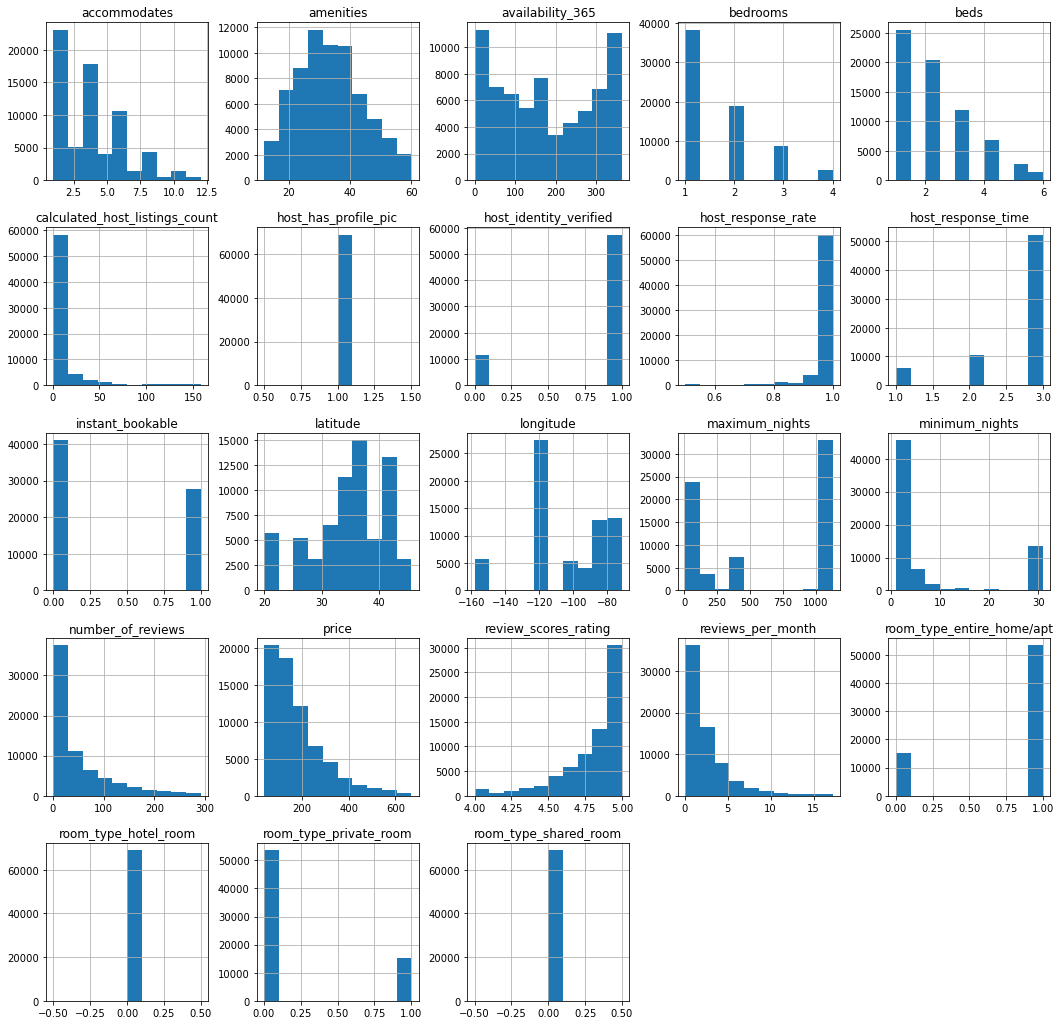

In [51]:
fig = plt.figure(figsize = (18, 18))
ax = fig.gca()
numeric_df.hist(ax=ax)
plt.show()

### Geo-Map for North America Continent

In [53]:
fig = go.Figure(data=go.Scattergeo(
    lon = numeric_df.longitude,
    lat = numeric_df.latitude,
    mode = 'markers',
    marker_color = 'red',
    #locations=lst, # Spatial coordinates
    #z = df['total exports'].astype(float), # Data to be color-coded
    #locationmode = 'USA-states', # set of locations match entries in `locations`
))

fig.update_layout(
    title_text = 'Airbnb Listings in United States of America',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## VI. DATA REDUCTION (FEATURES SELECTION / FEATURES EXTRACTION)



#### All numeric features

In [54]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68769 entries, 0 to 68768
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    68769 non-null  int64  
 1   amenities                       68769 non-null  int64  
 2   availability_365                68769 non-null  int64  
 3   bedrooms                        68769 non-null  float64
 4   beds                            68769 non-null  float64
 5   calculated_host_listings_count  68769 non-null  int64  
 6   host_has_profile_pic            68769 non-null  int64  
 7   host_identity_verified          68769 non-null  int64  
 8   host_response_rate              68769 non-null  float64
 9   host_response_time              68769 non-null  int32  
 10  instant_bookable                68769 non-null  int64  
 11  latitude                        68769 non-null  float64
 12  longitude                       

In [52]:
numeric_df.describe()

accommodates     amenities  availability_365      bedrooms  \
count  68769.000000  68769.000000      68769.000000  68769.000000   
mean       4.098533     33.448603        176.282918      1.649682   
std        2.213250     10.728299        120.532249      0.847984   
min        1.000000     12.000000          0.000000      1.000000   
25%        2.000000     26.000000         68.000000      1.000000   
50%        4.000000     33.000000        165.000000      1.000000   
75%        6.000000     40.000000        296.000000      2.000000   
max       12.000000     60.000000        364.000000      4.000000   

               beds  calculated_host_listings_count  host_has_profile_pic  \
count  68769.000000                    68769.000000               68769.0   
mean       2.196978                       10.915369                   1.0   
std        1.253310                       23.779008                   0.0   
min        1.000000                        1.000000                   1.0   
25%        1.000000                        1.000000                   1.0   
50%        2.000000                        2.000000                   1.0   
75%        3.000000                        7.000000                   1.0   
max        6.000000                      158.000000                   1.0   

       host_identity_verified  host_response_rate  host_response_time  ...  \
count            68769.000000        68769.000000        68769.000000  ...   
mean                 0.831930            0.975857            2.670985  ...   
std                  0.373931            0.070853            0.629003  ...   
min                  0.000000            0.500000            1.000000  ...   
25%                  1.000000            1.000000            3.000000  ...   
50%                  1.000000            1.000000            3.000000  ...   
75%                  1.000000            1.000000            3.000000  ...   
max                  1.000000            1.000000            3.000000  ...   

       maximum_nights  minimum_nights  number_of_reviews         price  \
count    68769.000000    68769.000000       68769.000000  68769.000000   
mean       608.990752        8.066469          49.784336    178.764240   
std        509.166172       11.073118          60.333168    117.602524   
min          7.000000        1.000000           1.000000     38.000000   
25%         45.000000        2.000000           7.000000     95.000000   
50%        365.000000        2.000000          24.000000    147.000000   
75%       1125.000000        6.000000          70.000000    229.000000   
max       1125.000000       31.000000         291.000000    668.000000   

       review_scores_rating  reviews_per_month  room_type_entire_home/apt  \
count          68769.000000       68769.000000               68769.000000   
mean               4.802692           2.480712                   0.777836   
std                0.221771           2.687363                   0.415704   
min                4.000000           0.070000                   0.000000   
25%                4.710000           0.640000                   1.000000   
50%                4.870000           1.640000                   1.000000   
75%                4.980000           3.320000                   1.000000   
max                5.000000          17.210000                   1.000000   

       room_type_hotel_room  room_type_private_room  room_type_shared_room  
count               68769.0            68769.000000                68769.0  
mean                    0.0                0.222164                    0.0  
std                     0.0                0.415704                    0.0  
min                     0.0                0.000000                    0.0  
25%                     0.0                0.000000                    0.0  
50%                     0.0                0.000000                    0.0  
75%                     0.0                0.000000                    0.0  
max        

#### Get only useful numeric features

In [53]:
test_df = test_df.drop(labels = ['host_has_profile_pic', 'room_type_hotel_room', 'room_type_shared_room'], axis = 1)

In [52]:
# test_df = test_df.drop(labels = ['host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_response_time', 'room_type_entire_home/apt', 'room_type_hotel_room', 'room_type_private_room', 'room_type_shared_room'], axis = 1)

In [54]:
test_df = test_df.reset_index(drop = True)

In [55]:
test_df.head(3)

accommodates  amenities  availability_365  bedrooms  beds  \
0             2         20                 0       1.0   1.0   
1             4         35               295       1.0   2.0   
2             2         28                21       1.0   1.0   

   calculated_host_listings_count  host_identity_verified  host_response_rate  \
0                               7                       1                0.69   
1                               1                       1                0.50   
2                               3                       0                1.00   

   host_response_time  instant_bookable  latitude  longitude  maximum_nights  \
0                   2                 1  35.57864  -82.59578             365   
1                   1                 0  35.61856  -82.55276             360   
2                   2                 0  35.59635  -82.50655             365   

   minimum_nights  number_of_reviews  price  review_scores_rating  \
0               1                 67   66.0                  4.52   
1              30                 57  134.0                  4.87   
2               3                 57   68.0                  4.66   

   reviews_per_month  room_type_entire_home/apt  room_type_private_room  
0               2.68                          0                       1  
1               0.52                          1                       0  
2               0.55                          0                       1

In [56]:
numeric_df = test_df

In [57]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68769 entries, 0 to 68768
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    68769 non-null  int64  
 1   amenities                       68769 non-null  int64  
 2   availability_365                68769 non-null  int64  
 3   bedrooms                        68769 non-null  float64
 4   beds                            68769 non-null  float64
 5   calculated_host_listings_count  68769 non-null  int64  
 6   host_identity_verified          68769 non-null  int64  
 7   host_response_rate              68769 non-null  float64
 8   host_response_time              68769 non-null  int32  
 9   instant_bookable                68769 non-null  int64  
 10  latitude                        68769 non-null  float64
 11  longitude                       68769 non-null  float64
 12  maximum_nights                  

To output multiple subplots, the figure containing the passed axes is being cleared.


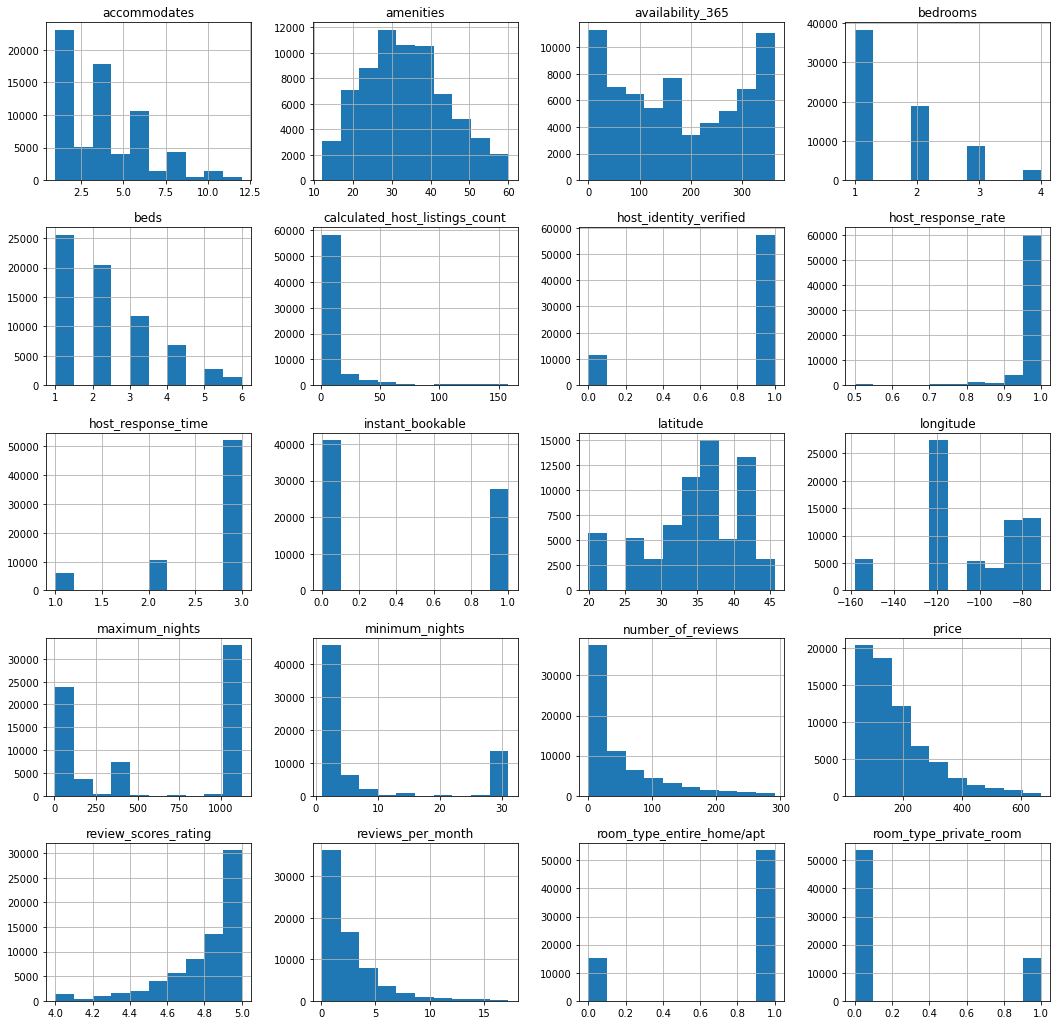

In [58]:
fig = plt.figure(figsize = (18, 18))
ax = fig.gca()
numeric_df.hist(ax=ax)
plt.show()

#### Distribution of number of bedrooms and number of beds

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Number of beds')

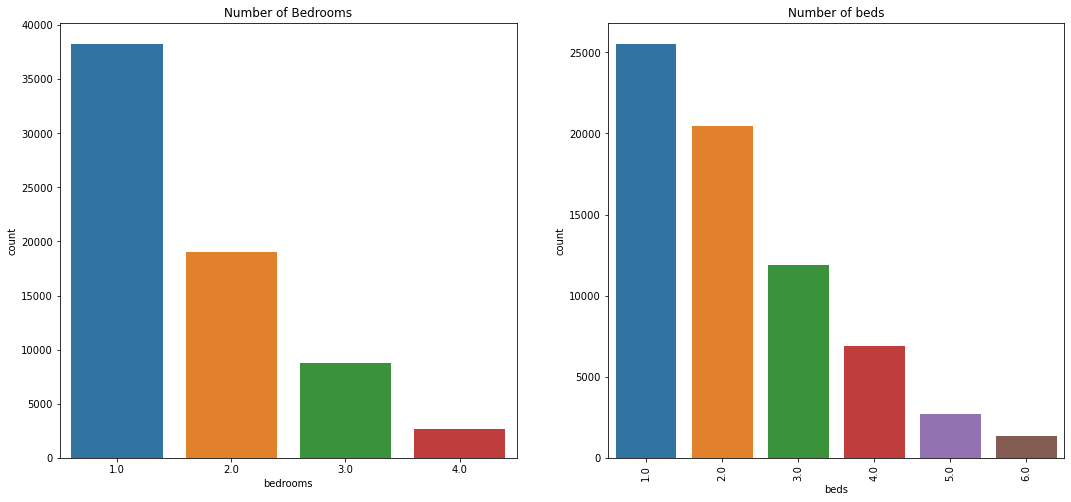

In [59]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(numeric_df['bedrooms'])
plt.title('Number of Bedrooms')
plt.subplot(1,2,2)
sns.countplot(numeric_df['beds'])
plt.xticks(rotation = 90)
plt.title('Number of beds')

#### Distribution of price

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='price', ylabel='Density'>

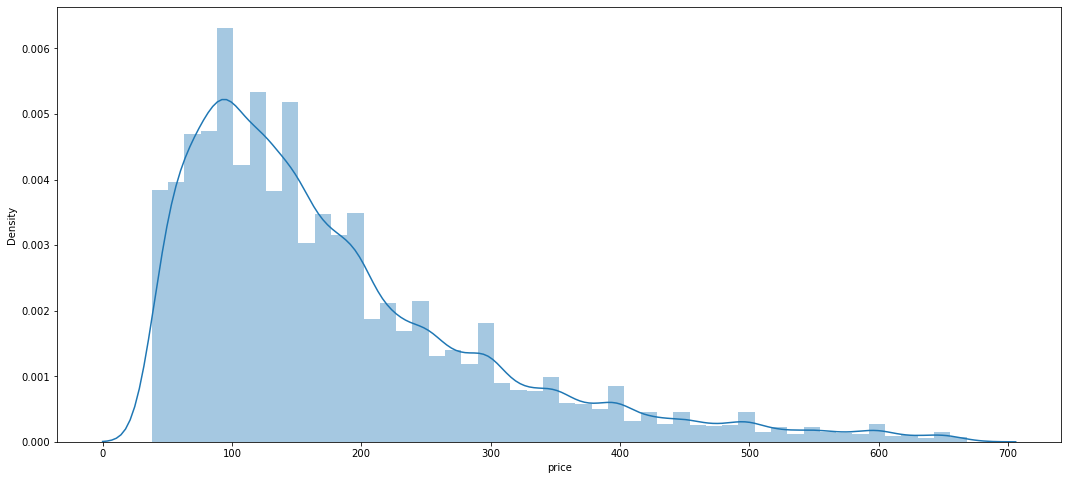

In [60]:
plt.figure(figsize = (18, 8))
sns.distplot(numeric_df['price'])

#### Average price by property type property_type

In [61]:
df.head(3)

accommodates  amenities  availability_365  bedrooms  beds  \
1             2         26               207       1.0   1.0   
2             2         20                 0       1.0   1.0   
3             1         16               225       1.0   6.0   

   calculated_host_listings_count  host_has_profile_pic  \
1                               7                     1   
2                               7                     1   
3                               7                     1   

   host_identity_verified                             host_location  \
1                       1  Asheville, North Carolina, United States   
2                       1  Asheville, North Carolina, United States   
3                       1  Asheville, North Carolina, United States   

   host_response_rate  ...  minimum_nights  number_of_reviews price  \
1                0.69  ...               1                340  92.0   
2                0.69  ...               1                 67  66.0   
3                0.69  ...               1                291  33.0   

                      property_type  review_scores_rating  reviews_per_month  \
1                 Entire guesthouse                  4.57               5.43   
2  Private room in residential home                  4.52               2.68   
3             Shared room in hostel                  4.69               3.40   

   room_type_entire_home/apt  room_type_hotel_room  room_type_private_room  \
1                          1                     0                       0   
2                          0                     0                       1   
3                          0                     0                       0   

  room_type_shared_room  
1                     0  
2                     0  
3                     1  

[3 rows x 26 columns]

In [62]:
# Average house prices by property_type

# Function to output average price for a given property_type
def zip_avg(property_type):
    zip_avg = []
    for _zip in property_type:
        _zip = df[(df['property_type'] == _zip)]
        zip_avg.append(_zip['price'].mean())
    return (zip_avg)

# Extracting unique zip codes from the dataset
all_zipcodes = df.property_type.unique()
# Sorting them for better accessibility
all_zipcodes.sort()
# Extracting average price for each zipcode
zipcode_average = list(zip_avg(all_zipcodes))

# Creating the dataframe of average price and their corrsponding zipcode
price_by_zipcode = pd.DataFrame([])
price_by_zipcode['property_type'] = all_zipcodes
price_by_zipcode["Average_house_price"] = zipcode_average

#sorting by price
price_by_zipcode = price_by_zipcode.sort_values(by=['Average_house_price']).reset_index(drop=True)
price_by_zipcode

property_type  Average_house_price
0          Shared room in dorm            19.200000
1    Shared room in dome house            20.000000
2      Shared room in bungalow            21.555556
3     Shared room in farm stay            26.000000
4         Shared room in cabin            31.000000
..                         ...                  ...
114                   Windmill           895.000000
115               Entire villa          1000.035870
116      Shared room in island          1128.000000
117                     Castle          1373.384615
118       Private room in boat          1433.333333

[119 rows x 2 columns]

#### Shared room in dorm costs the least price on an average and Private room in boat costs the highest

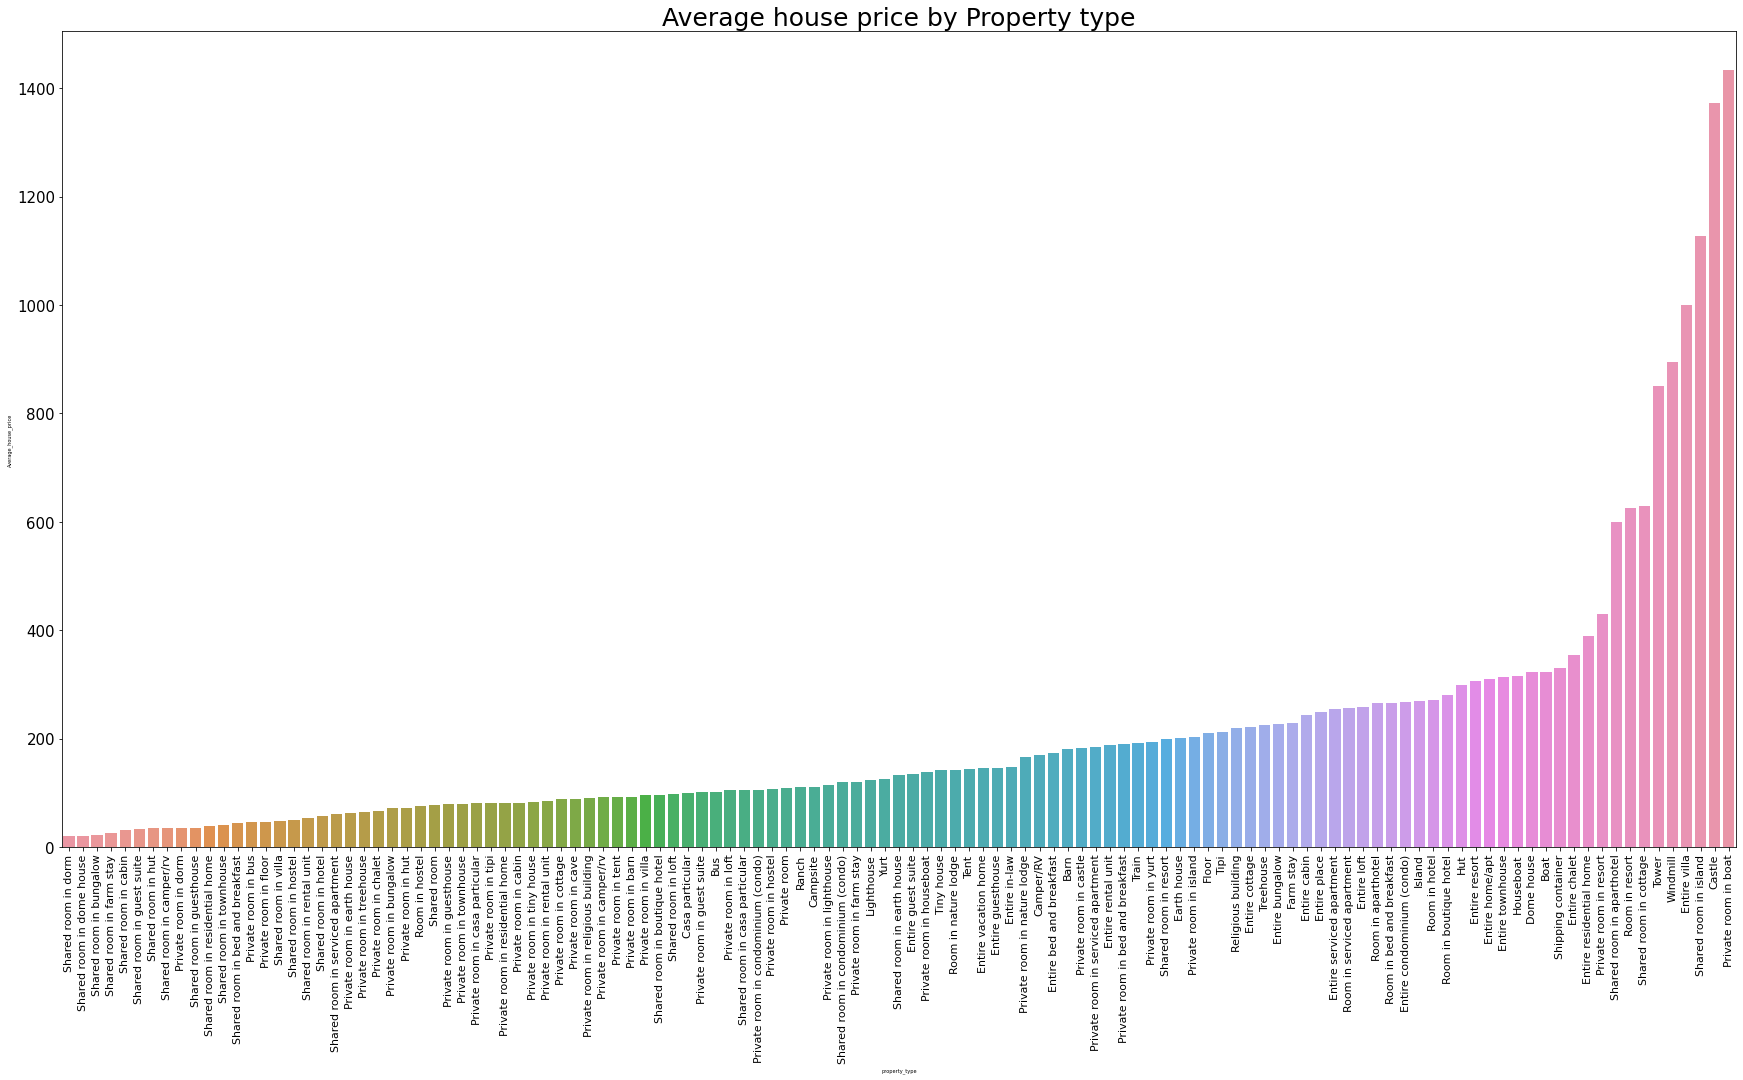

In [63]:
# TO DO Reallign the labels 
plt.figure(figsize=(30,15))
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=15)
plt.title('Average house price by Property type', fontsize=25)
plt.xlabel('Property_Type', fontsize=5)
plt.ylabel('Avg',fontsize=5)

sns.barplot(y=price_by_zipcode['Average_house_price'], x=price_by_zipcode['property_type'], order=price_by_zipcode['property_type'])

plt.show()

### Property Price Distribution by Room Type

Text(0.5, 1.0, 'Listing Type mostly selected by Customers')

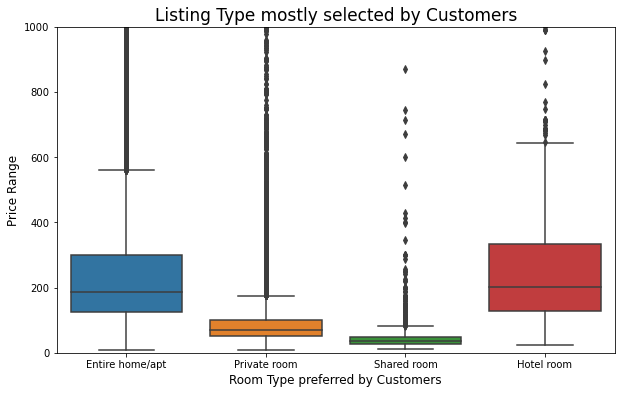

In [64]:
temp_df = categorical_df.copy(deep=True)
temp_df.price = temp_df.price.apply(lambda x: float(x.replace('$','').replace(',','')))

plt.figure(figsize = (10,6))
ax = sns.boxplot(x='room_type', y='price', data=temp_df)
ax.set(ylim=(0,1000))
ax.set_xlabel('Room Type preferred by Customers', fontsize=12)
ax.set_ylabel('Price Range', fontsize=12)
ax.set_title('Listing Type mostly selected by Customers', fontsize=17)

#### Heatmap

<AxesSubplot:>

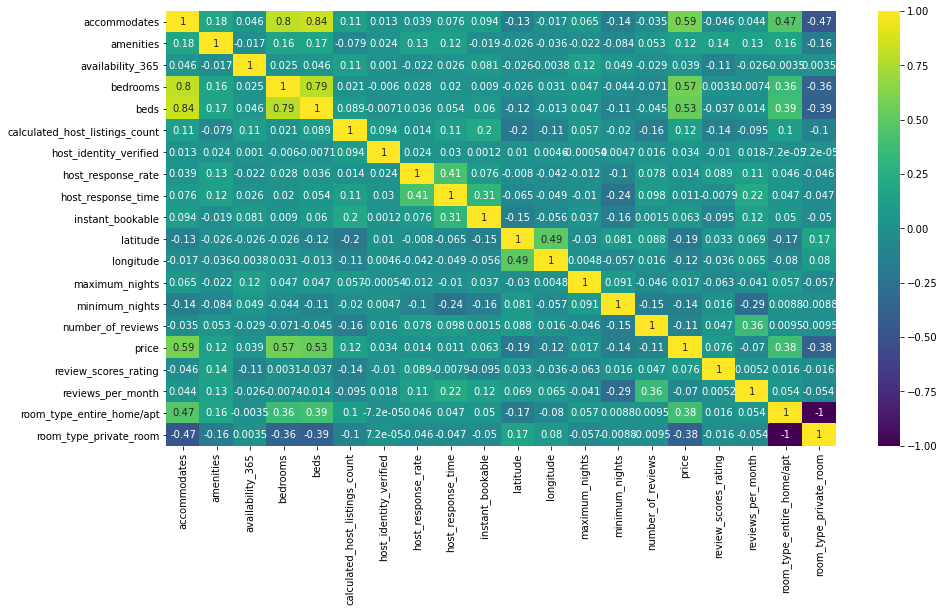

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')

## VIII. MODELS BUILDING PREPARATION

### 1.	Check for multicoliniearity

In [66]:
numeric_df = numeric_df.drop(['longitude', 'latitude'], axis=1)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(numeric_df)

variables         VIF
0                     accommodates    4.784786
1                        amenities    1.110507
2                 availability_365    1.043353
3                         bedrooms    3.491666
4                             beds    3.864935
5   calculated_host_listings_count    1.156497
6           host_identity_verified    1.015801
7               host_response_rate    1.233356
8               host_response_time    1.422253
9                 instant_bookable    1.181762
10                  maximum_nights    1.033820
11                  minimum_nights    1.235925
12               number_of_reviews    1.192546
13                           price    1.753741
14            review_scores_rating    1.085827
15               reviews_per_month    1.300769
16       room_type_entire_home/apt  518.488946
17          room_type_private_room  146.496143

In [68]:
# df_upt= numeric_df.drop(['room_type_private_room', 'room_type_entire_home/apt','review_scores_rating','host_response_rate','host_response_time','accommodates','beds','amenities'], axis=1)
# calc_vif(df_upt)

df_upt= numeric_df.drop(['room_type_entire_home/apt', 'calculated_host_listings_count', 'maximum_nights', 'review_scores_rating', 'host_response_rate', 'host_response_time', 'amenities', 'beds'], axis=1)
calc_vif(df_upt)

# df_upt= numeric_df.drop(['reviews_per_month', 'room_type_entire_home/apt', 'review_scores_rating','host_response_rate','host_response_time', 'beds', 'amenities'], axis=1)
# calc_vif(df_upt)

variables        VIF
0            accommodates  14.858495
1        availability_365   2.935446
2                bedrooms  14.346273
3  host_identity_verified   4.532796
4        instant_bookable   1.722378
5          minimum_nights   1.599540
6       number_of_reviews   1.881684
7                   price   5.422074
8       reviews_per_month   2.215553
9  room_type_private_room   1.418164


### 2.	Separate the target variable in the training set & test set

In [69]:
X = df_upt.drop(["price"], axis = 1)

y = df_upt["price"]

feature_names = X.columns

In [70]:
X.head()

accommodates  availability_365  bedrooms  host_identity_verified  \
0             2                 0       1.0                       1   
1             4               295       1.0                       1   
2             2                21       1.0                       0   
3             4               321       2.0                       0   
4             2               315       1.0                       0   

   instant_bookable  minimum_nights  number_of_reviews  reviews_per_month  \
0                 1               1                 67               2.68   
1                 0              30                 57               0.52   
2                 0               3                 57               0.55   
3                 0              30                 24               0.21   
4                 0               2                 46               4.71   

   room_type_private_room  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0

### 3. Create training set and test set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [72]:
X_train.head()

accommodates  availability_365  bedrooms  host_identity_verified  \
49995             7               322       3.0                       1   
5685              6                50       2.0                       1   
39944             6                86       3.0                       1   
3296              6               251       2.0                       1   
68129             3               111       1.0                       0   

       instant_bookable  minimum_nights  number_of_reviews  reviews_per_month  \
49995                 1               1                  3               2.05   
5685                  0               1                  4               0.08   
39944                 1               2                 40               1.68   
3296                  1               2                  7               0.57   
68129                 0               1                 71               7.42   

       room_type_private_room  
49995                       0  
5685                        0  
39944                       0  
3296                        0  
68129                       0

In [73]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [74]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(48138, 9)

(48138,)

(20631, 9)

(20631,)

### 4.	Feature Transformation 

#### a.	Robust Scaler
Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.


In [75]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test  = rc.transform(X_test)

## MODELS BUILDING

### 1.	Linear Regression



#### a. Build

In [76]:
# train RF regressor model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [78]:
import joblib

# save the model
joblib.dump(LinearRegression_model, "final_model_lr.joblib")

['final_model_lr.joblib']

Calculate Model coefficients:

In [77]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", LinearRegression_model.coef_[i].round(4))

Model coefficients:

accommodates = 55.3002
availability_365 = 4.2331
bedrooms = 39.9046
host_identity_verified = 10.9168
instant_bookable = 3.5001
minimum_nights = -5.8117
number_of_reviews = -7.8057
reviews_per_month = -12.507
room_type_private_room = -46.2889


#### b.	Predict y_train_predict

In [82]:
y_train_predict = LinearRegression_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [83]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 64.18940291055765
MSE: 8016.848134703797
RMSE: 89.5368535001303
R^2: 0.4161068482809316


#### c. Predict y_test_predict

In [84]:
y_test_predict = LinearRegression_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [85]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 64.65269537857176
MSE: 8208.270596084785
RMSE: 90.5995065995659
R^2: 0.4162986935888364


In [ ]:
# Calculate the absolute errors
errors = abs(y_test_predict - y_test)
errors_df["Linear Regression"] = errors

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [86]:
range(len(y_test))

range(0, 20631)

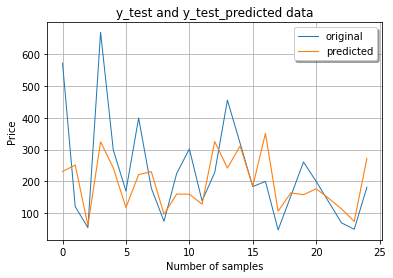

In [87]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

### 2.	Decision Tree



#### Build the decision tree model

In [89]:
# train RF regressor model
DecisionTree_model = DecisionTreeRegressor(criterion = "friedman_mse", max_depth = 10, random_state = 42)
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, random_state=42)

#### Predicting on train data

In [90]:
y_train_predict = DecisionTree_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [91]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 58.2236889435553
MSE: 6859.222784030686
RMSE: 82.82042492061174
R^2: 0.5004204716846744


#### Predicting on test data

In [92]:
y_test_predict = DecisionTree_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [93]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 64.14245928701489
MSE: 8441.658562885801
RMSE: 91.87849891506609
R^2: 0.39970215726273417


In [94]:
# Calculate the absolute errors
errors = abs(y_test_predict - y_test)
errors_df["Decision Tree"] = errors

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 64.14 degrees.
Accuracy: 58.79 %.


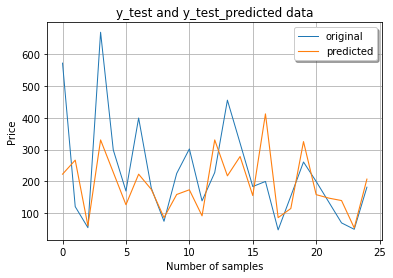

In [95]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

### 3.	Random Forest



#### Build RF Model

In [96]:
# train RF regressor model
RandomForest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Predicting on train data

In [97]:
y_train_predict = RandomForest_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [98]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 23.465971741049376
MSE: 1113.3760966581826
RMSE: 33.36729081987602
R^2: 0.9189091938373808


#### Predicting on test data

In [99]:
y_test_predict = RandomForest_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [100]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 64.22277090166362
MSE: 8219.45947593032
RMSE: 90.66123469228907
R^2: 0.41550303709741543


In [101]:
# Calculate the absolute errors
errors = abs(y_test_predict - y_test)
errors_df["Random Forest"] = errors

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 64.22 degrees.
Accuracy: 58.0 %.


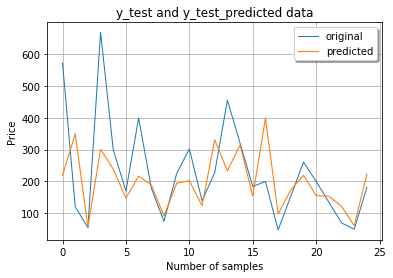

In [102]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], RandomForest_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], RandomForest_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


##### Feature Importance

In [ ]:

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': RandomForest_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

### 4. XGBoost


#### Building the model

In [103]:
#train XGBoost model
XGB_model = XGBRegressor(n_estimators = 100, learning_rate = 0.08, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 10)

XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
import joblib

# save the model
joblib.dump(RandomForest_model, "final_model.joblib")

['final_model.joblib']

#### Predicting on train data

In [ ]:
y_train_predict = XGB_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

#### Predicting on test data

In [ ]:
y_test_predict = XGB_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

In [ ]:
# Calculate the absolute errors
errors = abs(y_test_predict - y_test)
errors_df["XGBoost"] = errors

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5


# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], XGB_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5


# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], XGB_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


##### Feature Importance

In [ ]:

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': XGB_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

## Model Comparison on Test Data

###  To compare models, we chose 'Absolute Error Matrices' to figure out the best performing model over the test data which we will be used for the final predicting model.

In [ ]:
plt.figure(figsize=(8,6))
errors_df.boxplot(showfliers=False, patch_artist=True, medianprops=dict(linestyle='-', linewidth=4, color='yellow'),
            vert=False, widths=0.35)
ax = plt.gca()
ax.set_xlabel("RMSE (Predicted Price in USD)", fontsize=14)
ax.set_title("Model Comparison on Test Data ", fontsize=16, fontweight="bold")
plt.savefig("model_comparison.png", bbox_inches="tight")